In [1]:
import ROOT
f = ROOT.TFile('outWithRiderFits.root')
module_label = 'Calo23RiderFits'

t = f.Get('{}/fits/fitTree'.format(module_label))
n_entries = t.BuildIndex('fillNum', 'xtalNum*(waveformIndex == 1) - 1*(waveformIndex != 1)')

Welcome to JupyROOT 6.08/02


In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
import numpy as np
import seaborn

In [3]:
wf_arrays = np.zeros((800,54))
for xtal_num in range(54):
    entry_num = t.GetEntryNumberWithIndex(2, xtal_num) + 1
    t.GetEntry(entry_num)
    wf_arrays[:,xtal_num] = np.array(t.trace)
wf_df = pd.DataFrame(wf_arrays, columns=('xtal {}'.format(i) for i in range(54)))
wf_df.index.name = 'sample number'

In [4]:
wf_df.head()

,xtal 0,xtal 1,xtal 2,xtal 3,xtal 4,xtal 5,xtal 6,xtal 7,xtal 8,xtal 9,...,xtal 44,xtal 45,xtal 46,xtal 47,xtal 48,xtal 49,xtal 50,xtal 51,xtal 52,xtal 53
sample number,,,,,,,,,,,,,,,,,,,,,
0,1759.0,1762.0,1763.0,1758.0,1820.0,1788.0,1753.0,1777.0,1781.0,1750.0,...,1775.0,1756.0,1780.0,1744.0,1757.0,1771.0,1764.0,1785.0,1796.0,1808.0
1,1752.0,1760.0,1758.0,1760.0,1803.0,1793.0,1770.0,1780.0,1773.0,1756.0,...,1772.0,1753.0,1784.0,1748.0,1755.0,1780.0,1761.0,1784.0,1770.0,1794.0
2,1760.0,1754.0,1762.0,1757.0,1801.0,1789.0,1772.0,1786.0,1768.0,1755.0,...,1771.0,1761.0,1784.0,1738.0,1750.0,1767.0,1781.0,1793.0,1763.0,1770.0
3,1749.0,1764.0,1759.0,1758.0,1810.0,1781.0,1773.0,1776.0,1770.0,1749.0,...,1780.0,1772.0,1788.0,1747.0,1751.0,1754.0,1781.0,1789.0,1781.0,1773.0
4,1754.0,1764.0,1762.0,1754.0,1824.0,1785.0,1761.0,1782.0,1782.0,1747.0,...,1773.0,1757.0,1779.0,1749.0,1750.0,1760.0,1780.0,1790.0,1797.0,1795.0


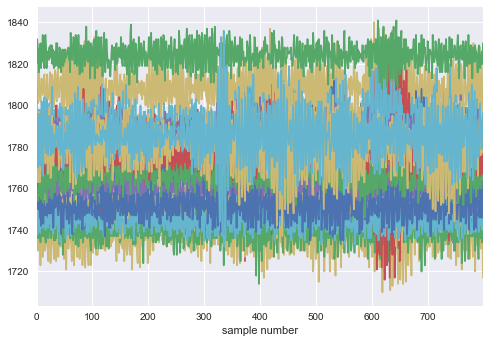

In [5]:
wf_df.plot(legend=False)

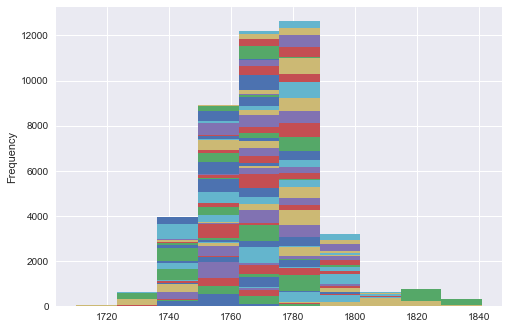

In [6]:
wf_df.plot.hist(stacked=True, legend=False)

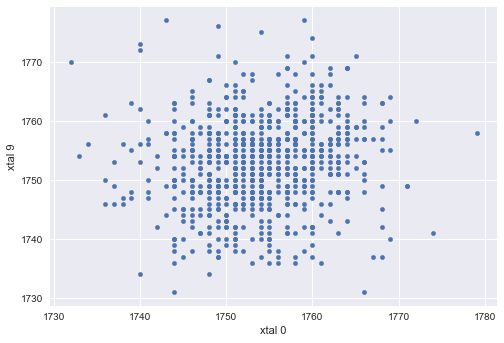

In [7]:
wf_df.plot.scatter(x='xtal 0', y='xtal 9')

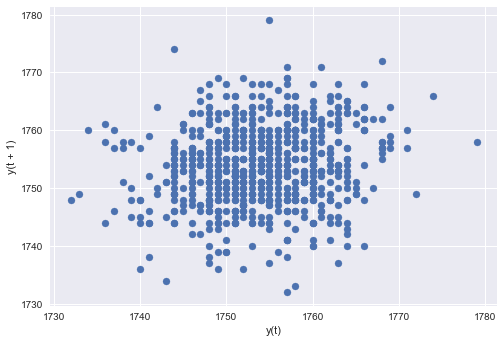

In [8]:
from pandas.tools.plotting import lag_plot
lag_plot(wf_df['xtal 0'])

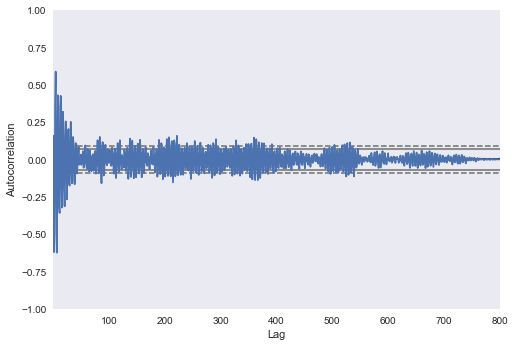

In [9]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(wf_df['xtal 0'])

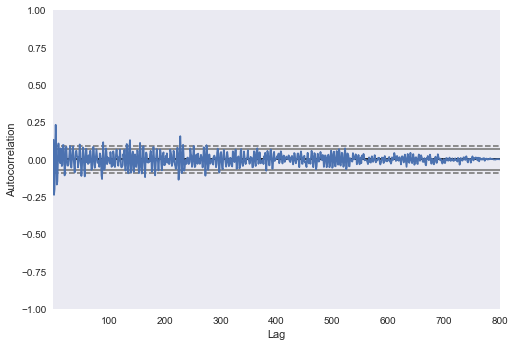

In [10]:
autocorrelation_plot(wf_df['xtal 3'])

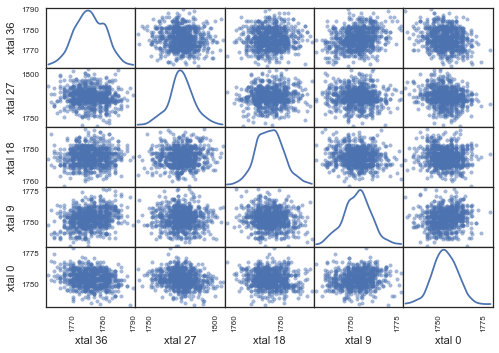

In [11]:
from pandas.tools.plotting import scatter_matrix
seaborn.set(font_scale=1)
seaborn.set_style('white')
scatters=scatter_matrix(wf_df.loc[:,['xtal {}'.format(i) for i in range(36,-1,-9)]], diagonal='kde')

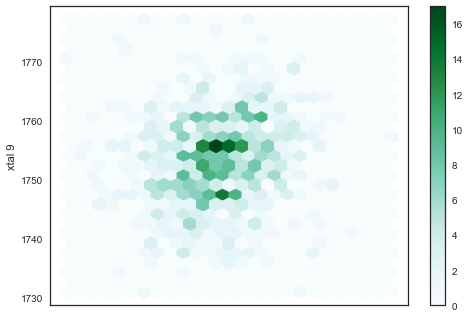

In [12]:
wf_df.plot.hexbin(x='xtal 0', y='xtal 9', gridsize=25)

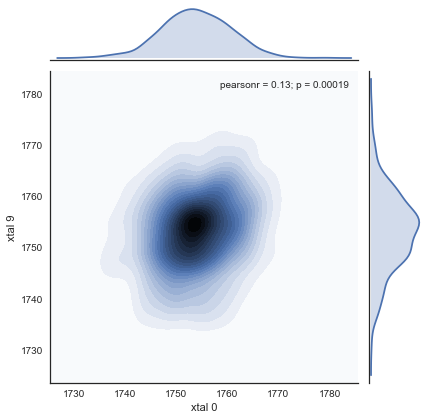

In [13]:
seaborn.jointplot(x='xtal 0', y='xtal 9', data=wf_df, kind='kdeplot', joint_kws={'n_levels':30})

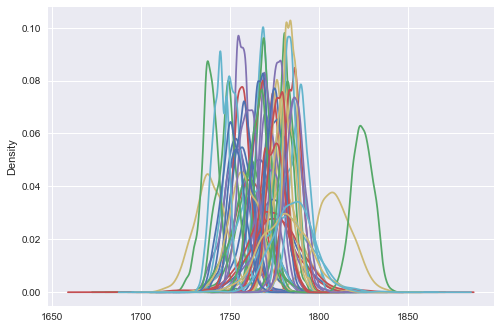

In [14]:
seaborn.set_style('darkgrid')
wf_df.plot.kde(legend=False)

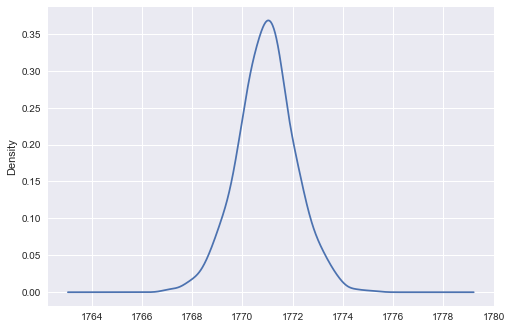

In [15]:
wf_df.mean(1).plot.kde()

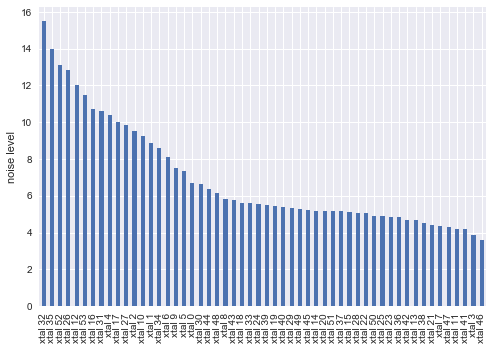

In [16]:
wf_df.std().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('noise level')

In [17]:
corrs = wf_df.corr()
corrs.values[np.tril_indices(corrs.columns.size)] = np.nan
corrs.head()

,xtal 0,xtal 1,xtal 2,xtal 3,xtal 4,xtal 5,xtal 6,xtal 7,xtal 8,xtal 9,...,xtal 44,xtal 45,xtal 46,xtal 47,xtal 48,xtal 49,xtal 50,xtal 51,xtal 52,xtal 53
xtal 0,NaN,0.005196,-0.135720,0.063407,-0.115794,0.070482,0.002088,-0.139876,-0.115216,0.131698,...,0.203394,0.003798,0.063260,0.003860,-0.086259,0.004547,0.024649,-0.090128,-0.100548,0.208342
xtal 1,NaN,NaN,-0.010372,0.133734,-0.140232,-0.027832,0.146013,0.050693,0.174255,-0.172726,...,0.189961,0.162963,0.027491,0.184501,0.086244,-0.195289,0.154386,0.131354,0.067590,0.127428
xtal 2,NaN,NaN,NaN,0.175706,0.157179,0.121564,0.396626,0.060814,0.313594,-0.144605,...,-0.023819,-0.019897,-0.020118,-0.095236,0.209500,-0.056955,0.028360,-0.239514,0.192877,-0.017756
xtal 3,NaN,NaN,NaN,NaN,-0.064598,0.036371,0.166231,-0.014940,0.113218,-0.097082,...,0.034538,0.068913,0.042900,0.125823,0.096719,-0.047904,0.068008,-0.059676,-0.022049,-0.056730
xtal 4,NaN,NaN,NaN,NaN,NaN,-0.355031,0.204166,0.033736,0.027250,-0.323145,...,-0.038425,-0.140071,0.058905,-0.110549,-0.229122,-0.061656,-0.002226,-0.009997,0.169011,-0.099088


In [18]:
corrs.stack()

xtal 0   xtal 1     0.005196
         xtal 2    -0.135720
         xtal 3     0.063407
         xtal 4    -0.115794
         xtal 5     0.070482
         xtal 6     0.002088
         xtal 7    -0.139876
         xtal 8    -0.115216
         xtal 9     0.131698
         xtal 10   -0.112622
         xtal 11    0.023190
         xtal 12   -0.206859
         xtal 13   -0.017723
         xtal 14   -0.026978
         xtal 15   -0.154989
         xtal 16    0.264319
         xtal 17   -0.273401
         xtal 18   -0.115502
         xtal 19   -0.053994
         xtal 20    0.154438
         xtal 21    0.074450
         xtal 22    0.066070
         xtal 23    0.023058
         xtal 24    0.021217
         xtal 25   -0.096066
         xtal 26   -0.307978
         xtal 27   -0.177139
         xtal 28   -0.072760
         xtal 29   -0.241361
         xtal 30   -0.198032
                      ...   
xtal 45  xtal 52    0.197106
         xtal 53   -0.080716
xtal 46  xtal 47    0.095939
         xtal 

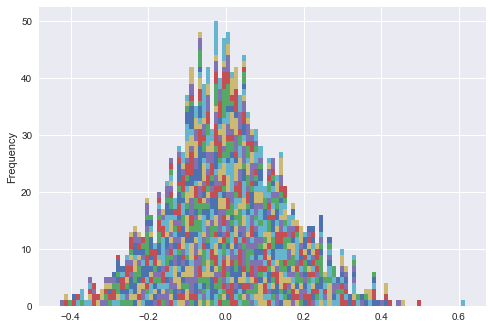

In [19]:
corrs.plot.hist(bins=100, legend=False, stacked=True)

In [20]:
corrs.stack().mean()

0.0015718683642052993

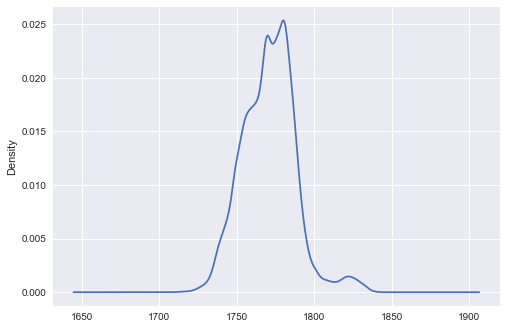

In [21]:
wf_df.stack().plot.kde()

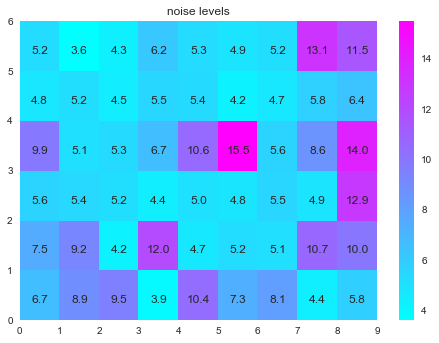

In [22]:
griddata = np.reshape(wf_df.std().as_matrix(), (6,9))
griddata = np.ma.masked_invalid(griddata)
heatmap = plt.pcolor(griddata, cmap='cool')
plt.colorbar(heatmap)
for y in range(griddata.shape[0]):
    for x in range(griddata.shape[1]):
        val = griddata[y,x]          
        plt.text(x+0.5, y+0.4, '{:.1f}'.format(val), horizontalalignment='center', verticalalignment='center')
title=plt.title('noise levels')

Learning a little bit about broadcasting
======================

I found this useful http://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/#id9

In [23]:
a = np.arange(1,6)[:,None]
a > np.arange(1,6)

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False]], dtype=bool)

In [24]:
ones =np.ones((4,4))

In [25]:
a > [2,2,3,4,5]

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False]], dtype=bool)

In [26]:
a

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [27]:
b= np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])

In [28]:
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [29]:
a+b

array([[ 2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12],
       [14, 15, 16, 17, 18],
       [20, 21, 22, 23, 24],
       [26, 27, 28, 29, 30]])

In [30]:
a.transpose() + b

array([[ 2,  4,  6,  8, 10],
       [ 7,  9, 11, 13, 15],
       [12, 14, 16, 18, 20],
       [17, 19, 21, 23, 25],
       [22, 24, 26, 28, 30]])

In [31]:
np.shape(a)

(5, 1)

In [32]:
arow = np.array([[1,2,3,4,5]])

In [33]:
np.shape(arow)

(1, 5)

In [34]:
arow

array([[1, 2, 3, 4, 5]])

In [35]:
a+arow

array([[ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

In [36]:
arow+a

array([[ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

In [37]:
ott = np.array([1,2,3])

In [38]:
ott[:,None] + ott

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [39]:
test = np.array([[1,2,3],[4,5,6]])

In [40]:
test

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
test + np.array([[1,2],[3,4]])[:,:,None]

array([[[ 2,  3,  4],
        [ 6,  7,  8]],

       [[ 4,  5,  6],
        [ 8,  9, 10]]])

*Let's test some math*

$\int_a^b x^2 dx$

In [42]:
a = np.zeros((4,4))

In [43]:
a[np.array([1,2,3,4])[:,None]<=[1,2,3,4]] = 1

In [44]:
a[np.array([1,2,3,4])[:,None]== [1,2,3,4]] = 2
a

array([[ 2.,  1.,  1.,  1.],
       [ 0.,  2.,  1.,  1.],
       [ 0.,  0.,  2.,  1.],
       [ 0.,  0.,  0.,  2.]])